<a href="https://colab.research.google.com/github/poisonkissedsk/Production-Grade-AI-QA-Suite/blob/main/Explainability_Testing_(XAI)_with_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-2255956154.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric] = StandardScaler().fit_transform(X[numeric])


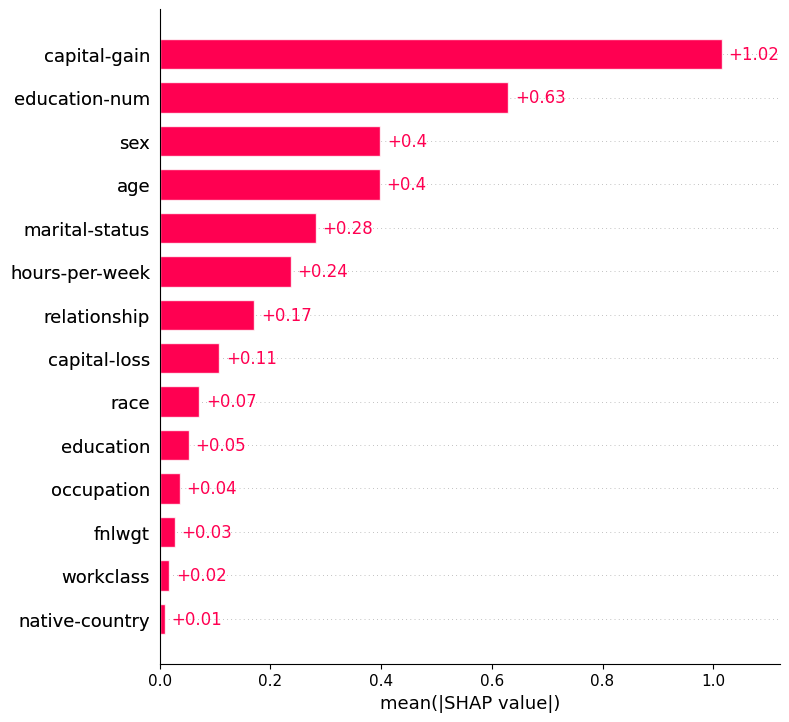

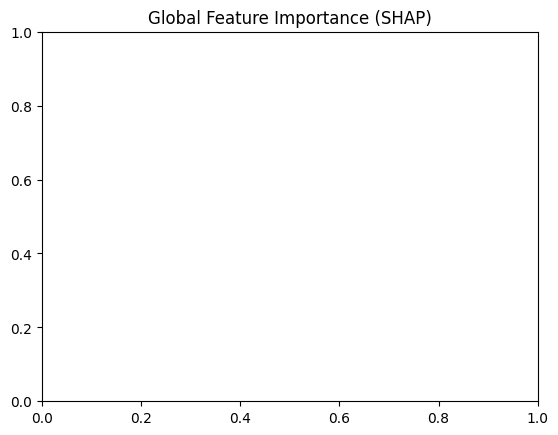

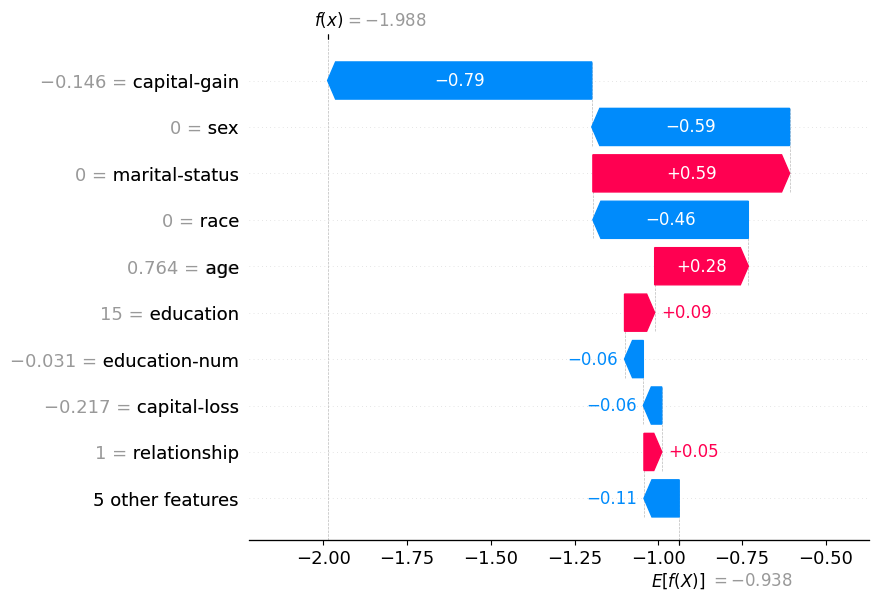

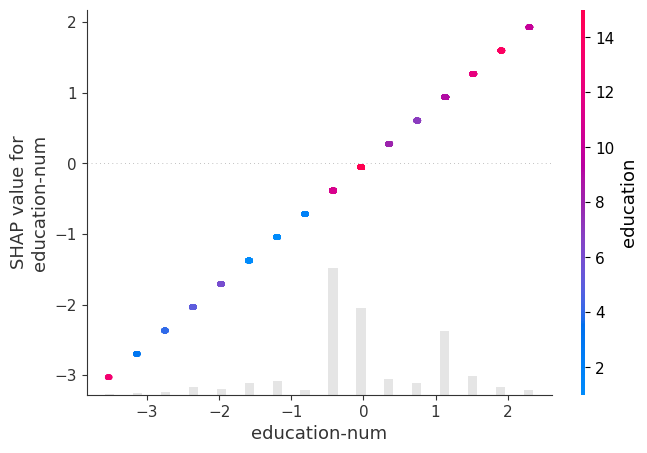

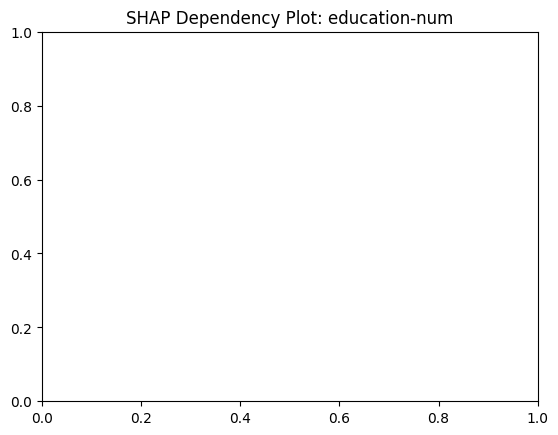

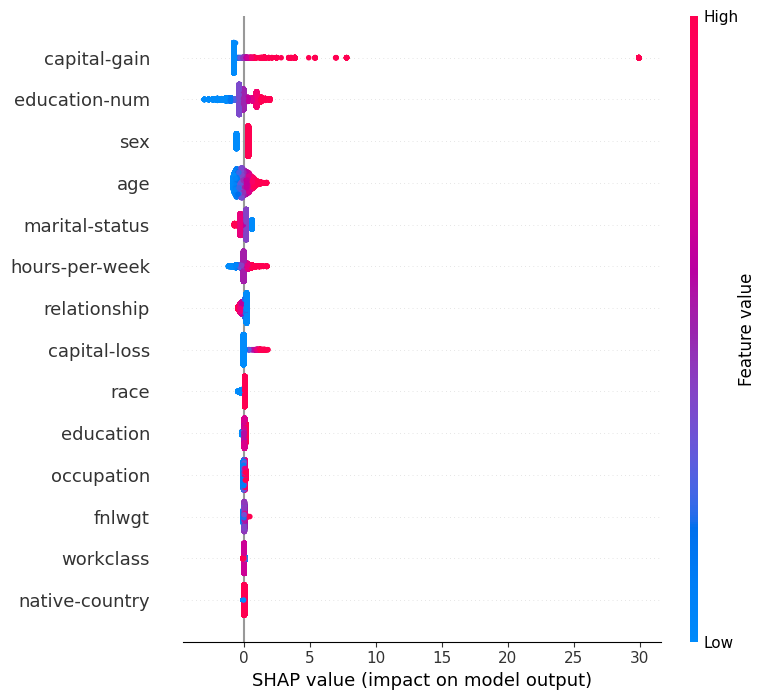

In [1]:
# 📒 Notebook 2: Explainability Testing (XAI) with SHAP - Google Colab

# -- SETUP --
!pip install shap scikit-learn pandas matplotlib seaborn --quiet

import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# -- STEP 1: Load and Prepare Data --

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)
df.dropna(inplace=True)
df['label'] = (df['income'] == '>50K').astype(int)

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in categorical:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df[categorical + numeric]
y = df['label']

X[numeric] = StandardScaler().fit_transform(X[numeric])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# -- STEP 2: Train Logistic Regression Screening Model --

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# -- STEP 3: Initialize SHAP Explainer --

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# -- STEP 4: Global Feature Importance --

shap.plots.bar(shap_values, max_display=15)
plt.title('Global Feature Importance (SHAP)')
plt.show()

# -- STEP 5: Per-Candidate Explanation (Local Explanations) --

# Explain individual candidate (example: 0th instance)
candidate_index = 0
shap.plots.waterfall(shap_values[candidate_index])

# -- STEP 6: Dependency Plots (Optional) --

# How does 'education-num' affect predictions?
shap.plots.scatter(shap_values[:, X_test.columns.get_loc('education-num')], color=shap_values)
plt.title('SHAP Dependency Plot: education-num')
plt.show()

# -- STEP 7: Summary Plot (Global View) --

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)